In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
plt.rcParams["figure.figsize"] = (16,6)

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [9]:
company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-05-04,131.490005,126.699997,131.190002,127.849998,137564700.0,127.633202,APPLE
2021-05-05,130.449997,127.970001,129.199997,128.100006,84000900.0,127.882790,APPLE
2021-05-06,129.750000,127.129997,127.889999,129.740005,78128300.0,129.520004,APPLE
2021-05-07,131.259995,129.479996,130.850006,130.210007,78892700.0,130.210007,APPLE
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.849998,APPLE
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004,APPLE
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997,APPLE
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.970001,APPLE
2021-05-14,127.889999,125.849998,126.250000,127.449997,81806500.0,127.449997,APPLE


In [10]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.757639,114.703849,116.337669,116.259573,1.280697e+08,115.825404
std,16.420936,15.993195,16.345629,16.179933,5.248386e+07,16.280252
min,79.125000,77.580002,78.292503,78.285004,4.669130e+07,77.761040
25%,112.177498,108.725002,110.403749,110.274998,9.030280e+07,109.734428
50%,121.515003,118.705002,120.090000,120.109997,1.127522e+08,119.901588
75%,129.727501,126.772501,128.540001,127.950003,1.532816e+08,127.717728
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [11]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-05-18 to 2021-05-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


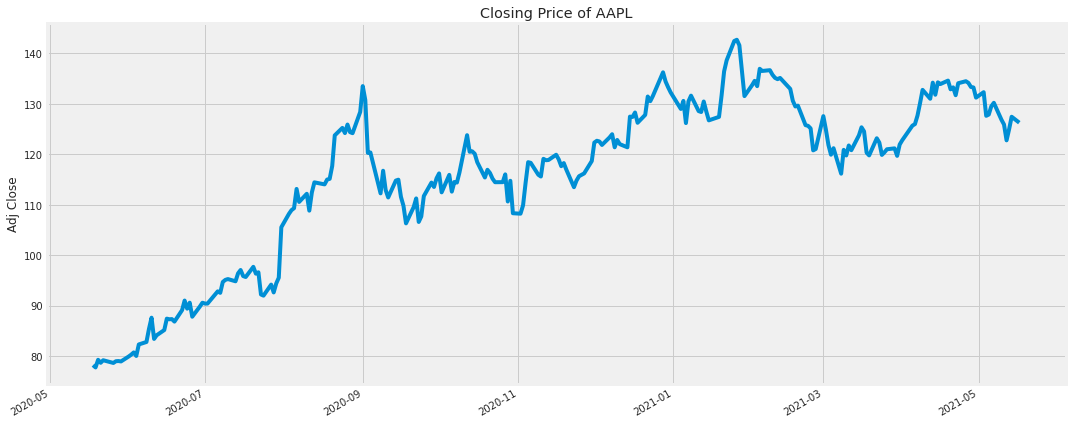

In [12]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

company['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {tech_list[0]}")
    
plt.tight_layout()

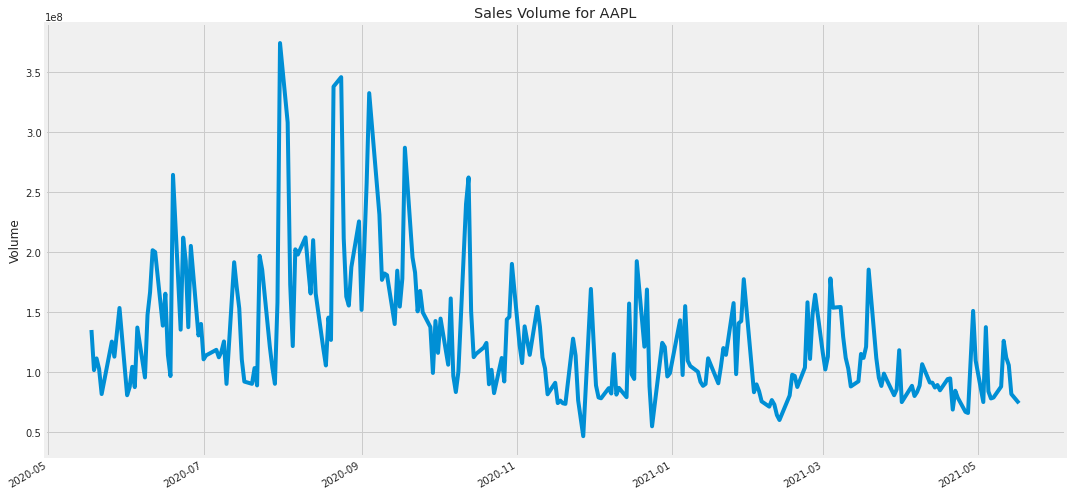

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))

company['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for {tech_list[0]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Now let's go ahead and plot all the additional Moving Averages

<Figure size 1152x432 with 0 Axes>

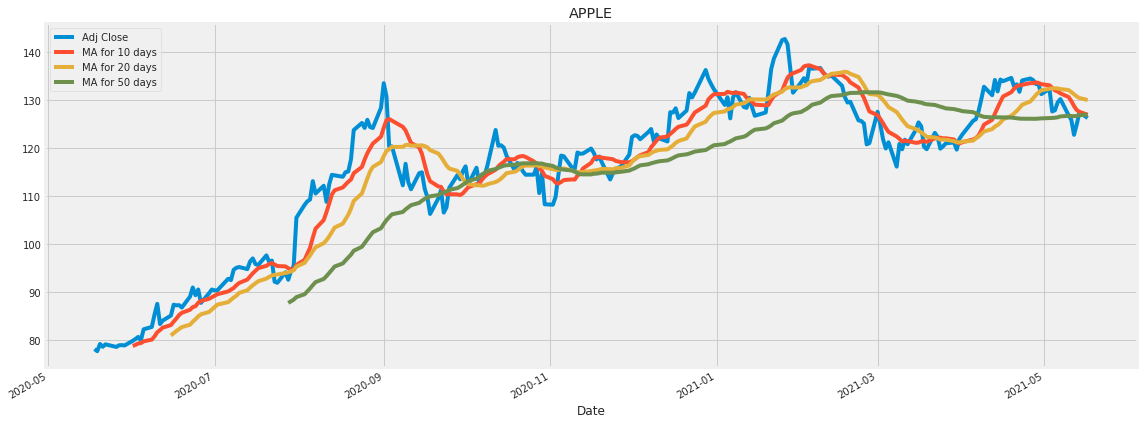

In [22]:
plt.figure(figsize=(16, 6))

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('APPLE')

plt.tight_layout()

# 3. What was the daily return of the stock on average?

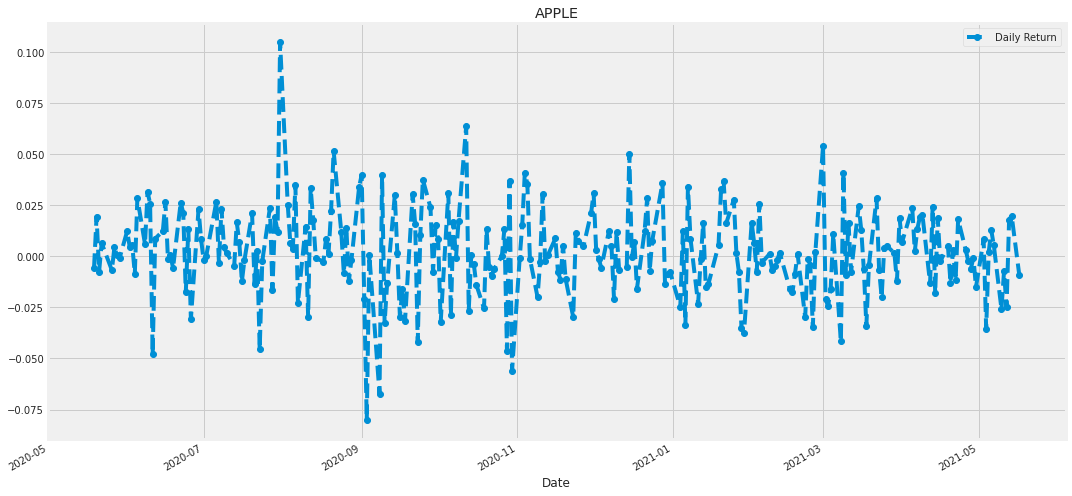

In [16]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(15, 7))

AAPL['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('APPLE')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


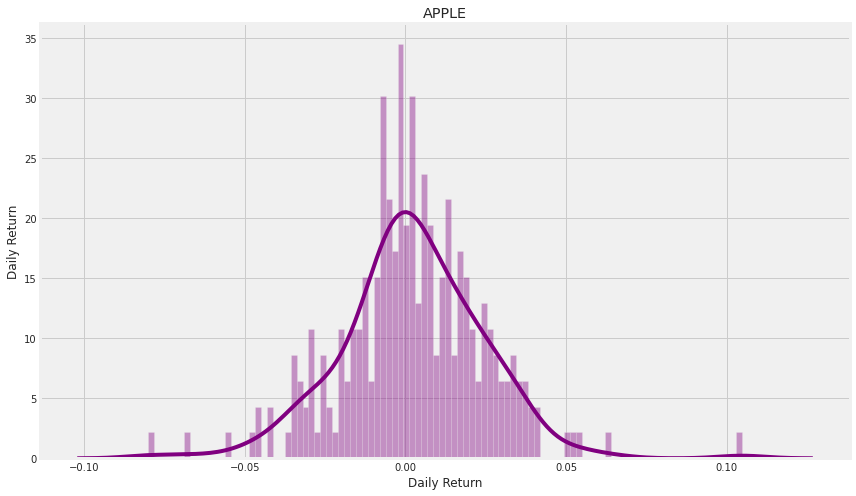

In [17]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title(f'{company_name[0]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

# 4. Predicting the closing price stock price of APPLE inc:

## Prepare the data

In [127]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.970001


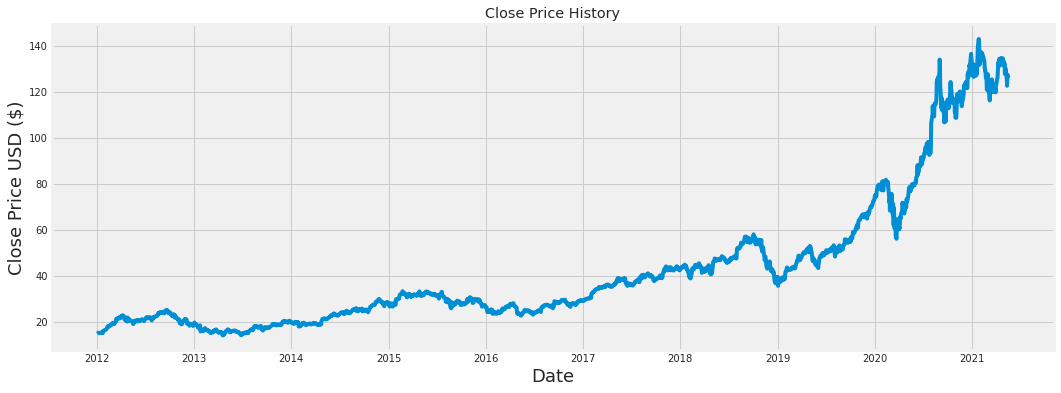

In [128]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [129]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2241

In [130]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.85922413],
       [0.87841729],
       [0.86928504]])

In [131]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# # Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

## Linear regression

In [121]:
from sklearn.linear_model import LinearRegression

In [124]:
lr = LinearRegression(normalize=True).fit(x_train, y_train)

In [125]:
lr_forecast = lr.predict(x_test)
predictions = scaler.inverse_transform(lr_forecast.reshape((1, -1)))

In [126]:
print('R_squared: {} \nMSE: {} \nMAE: {} \n'.format(r2_score(y_test, predictions.T), mean_squared_error(y_test, predictions.T),
      mean_absolute_error(y_test, predictions.T)))

R_squared: 0.7808880119571758 
MSE: 7.5357854829235 
MAE: 2.0963961326625937 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


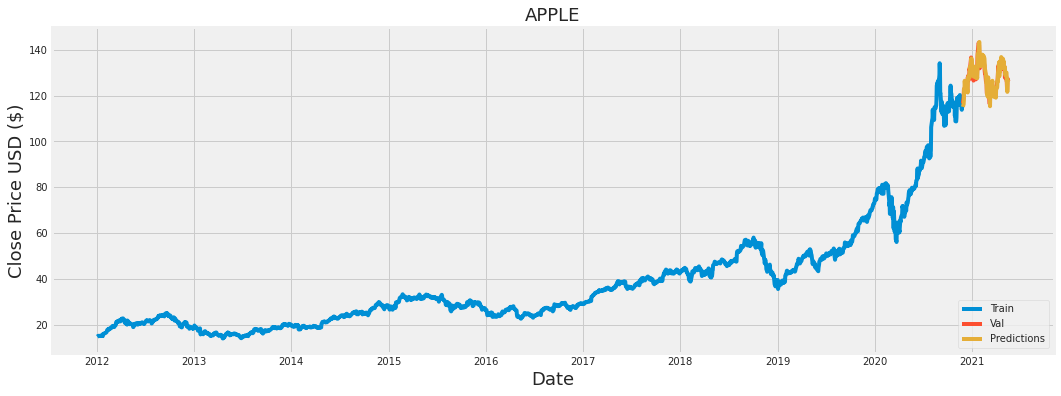

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions.T
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('APPLE', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Decision tree model

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

tree_prediction = tree.predict(x_test)
predictions = scaler.inverse_transform(tree_prediction.reshape((1, -1)))

In [42]:
print('R_squared: {} \nMSE: {} \nMAE: {} \n'.format(r2_score(y_test, predictions.T), mean_squared_error(y_test, predictions.T),
      mean_absolute_error(y_test, predictions.T)))

R_squared: -1.7266229875833137 
MSE: 93.77508784786342 
MAE: 8.273674141647469 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


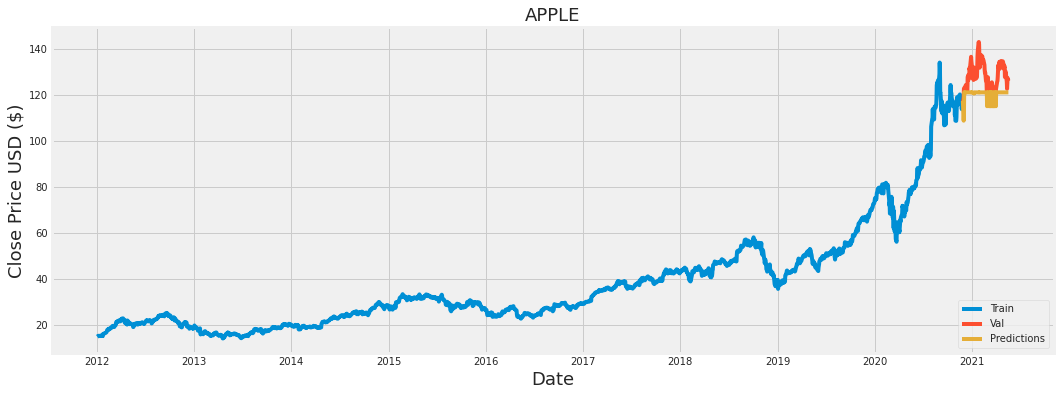

In [45]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions.T
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('APPLE', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(n_estimators = 1000))
sel.fit(x_train, y_train)

sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [97]:
selected_feat= pd.DataFrame(x_train).columns[(sel.get_support())]
print(selected_feat)

Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype='int64')


In [102]:
sel.get_params()

{'estimator': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 1000,
 'estimator__n_jobs'

In [98]:
sel.estimator.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
predictions = sel.estimator.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape((-1, 1)))

print('R_squared: {} \nMSE: {} \nMAE: {} \n'.format(r2_score(y_test, predictions), mean_squared_error(y_test, predictions),
      mean_absolute_error(y_test, predictions)))

R_squared: -1.2847808660752018 
MSE: 78.57908020471159 
MAE: 7.533499111637447 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


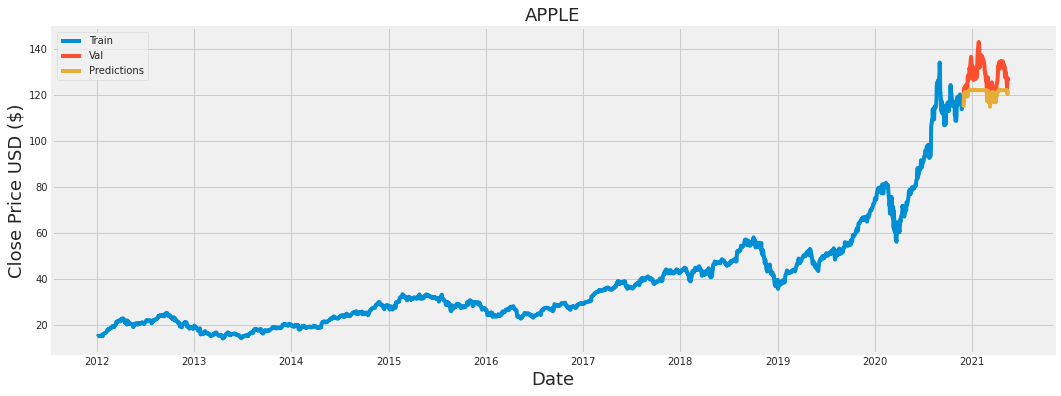

In [100]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('APPLE', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

# ARIMA

In [105]:
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Dickey–Fuller test: p=0.841198
Dickey–Fuller test: p=0.331099
Dickey–Fuller test: p=0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Dickey–Fuller test: p=0.000000


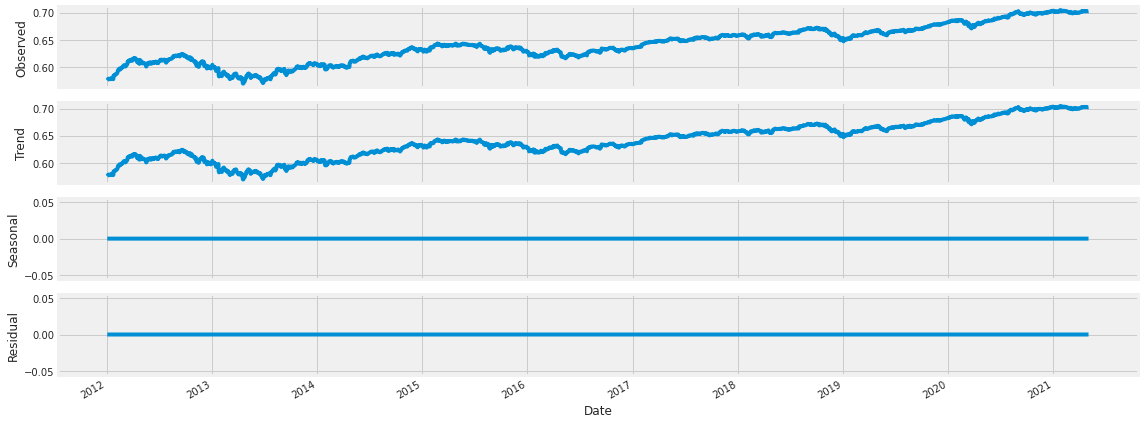

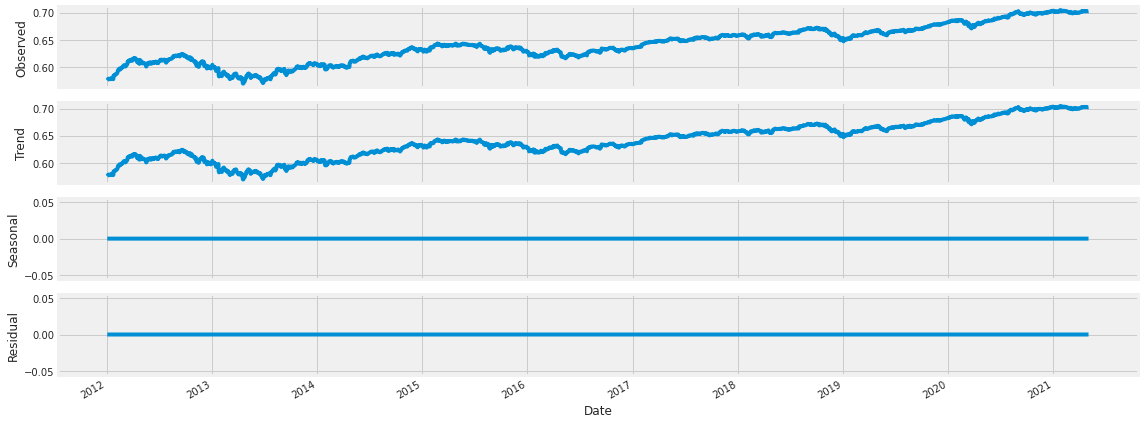

In [108]:
df = np.log(data.resample('1D').mean().dropna())
df_train = df[:-10]
df_test = df[-10:]

# Box-Cox
df_train['Weighted_Price_box'], lmbda = stats.boxcox(df_train['Close'])
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train['Weighted_Price_box'])[1])

# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

# Seasonal
df_train['prices_box_diff'] = df_train.Weighted_Price_box - df_train.Weighted_Price_box.shift(365)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.prices_box_diff[365:])[1])

# Regular
df_train['prices_box_diff2'] = df_train.prices_box_diff - df_train.prices_box_diff.shift(1)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.prices_box_diff2[366:])[1])

# Regular with season
df_train['prices_box_diff3'] = df_train.Weighted_Price_box - df_train.Weighted_Price_box.shift(1)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.prices_box_diff3[1:])[1])

# STL-decomposition
sm.tsa.seasonal_decompose(df_train.Weighted_Price_box, freq=1).plot()   

## ACF & PACF

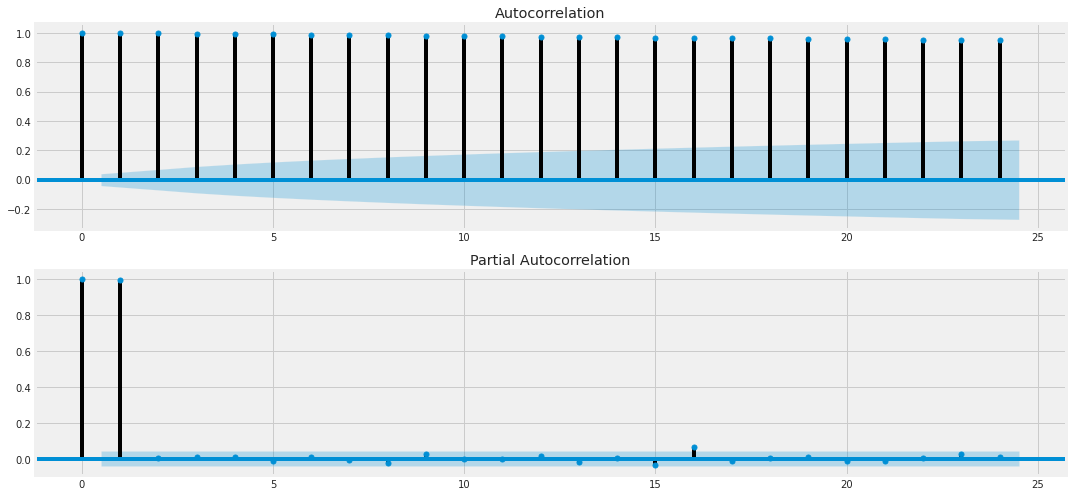

In [25]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_train.Weighted_Price_box.values.squeeze(), lags=24, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_train.Weighted_Price_box.values.squeeze(), lags=24, ax=ax)
plt.tight_layout()
plt.show()

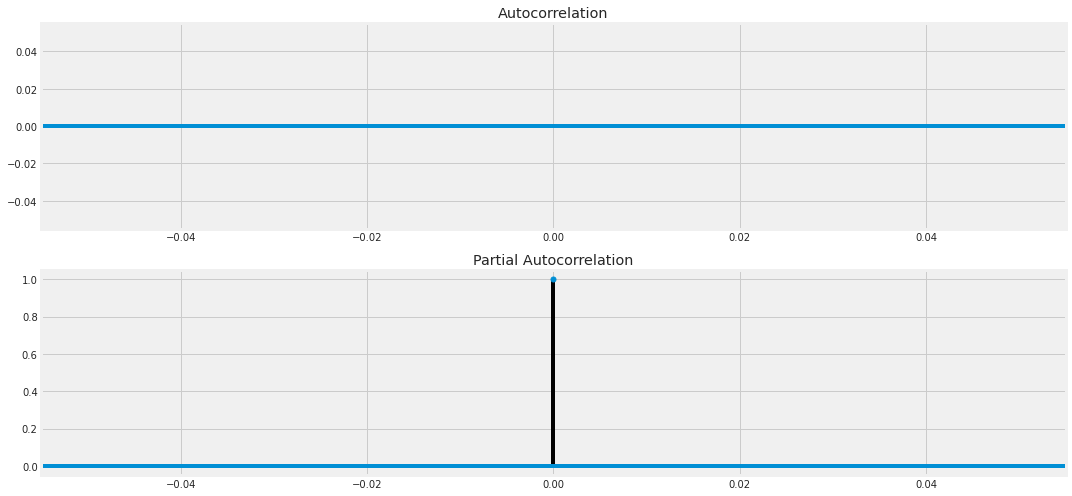

In [29]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_train.prices_box_diff.values.squeeze(), lags=24, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_train.prices_box_diff.values.squeeze(), lags=24, ax=ax)
plt.tight_layout()
plt.show()

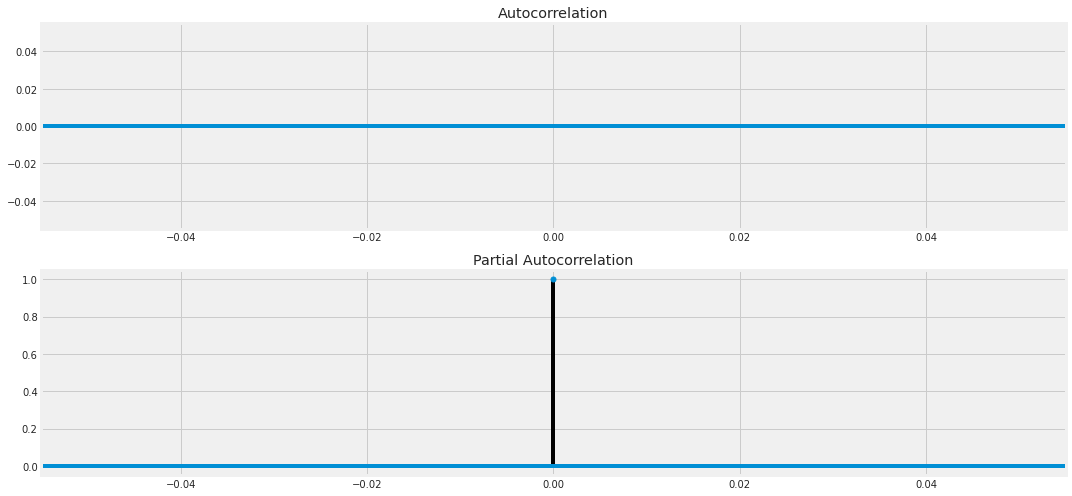

In [31]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_train.prices_box_diff2.values.squeeze(), lags=24, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_train.prices_box_diff2.values.squeeze(), lags=24, ax=ax)
plt.tight_layout()
plt.show()

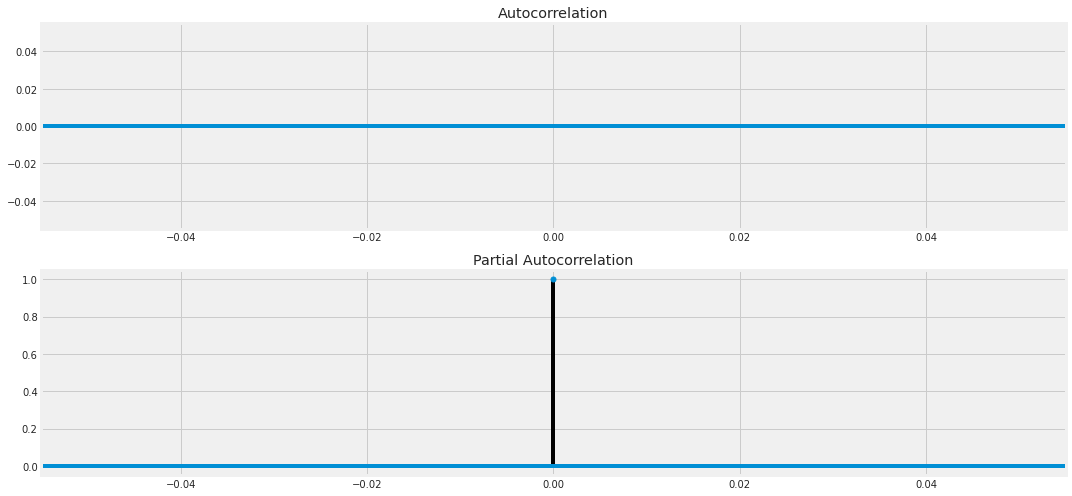

In [110]:

# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_train.prices_box_diff3.values.squeeze(), lags=24, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_train.prices_box_diff3.values.squeeze(), lags=24, ax=ax)
plt.tight_layout()
plt.show()

In [111]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.ARIMA(df_train['Weighted_Price_box'][1:], order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

arima_model = best_model
print(best_model.summary())

wrong parameters: (1, 1, 0, 0)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 0)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 0)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 0)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 0)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (1, 2, 2, 0)
wrong parameters: (1, 2, 2, 1)
wrong parameters: (2, 2, 0, 0)
wrong parameters: (2, 2, 0, 1)
wrong parameters: (2, 2, 1, 0)
wrong parameters: (2, 2, 1, 1)
wrong parameters: (2, 2, 2, 0)
wrong parameters: (2, 2, 2, 1)
                              ARIMA Model Results                               
Dep. Variable:     D.Weighted_Price_box   No. Observations:                 2346
Model:                   ARIMA(0, 1, 0)   Log Likelihood               12476.262
Method:                             css   S.D. of innovations              0.001
Date:                  Tue, 18 May 2021   AIC                         -24948.524
Time:                          08:32:

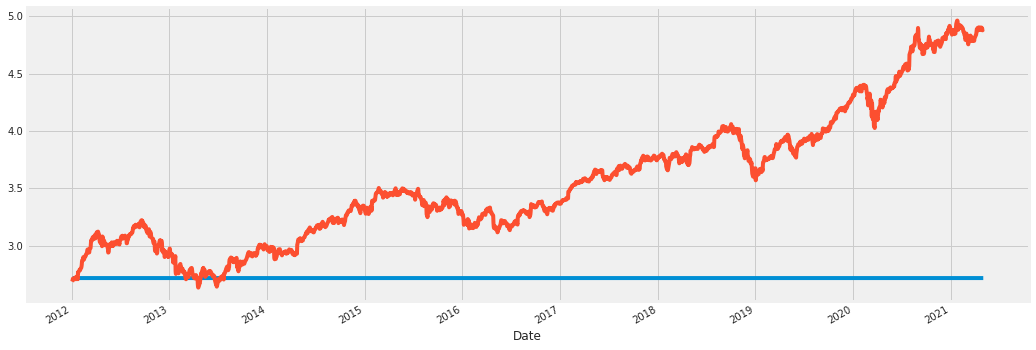

In [113]:
df_train['forecast'] = np.exp(invboxcox(best_model.predict(start=1, end=df_train.index[-1]), lmbda))
plt.figure(figsize=(16,6))
df_train['forecast'].plot()
df_train['Close'].plot()

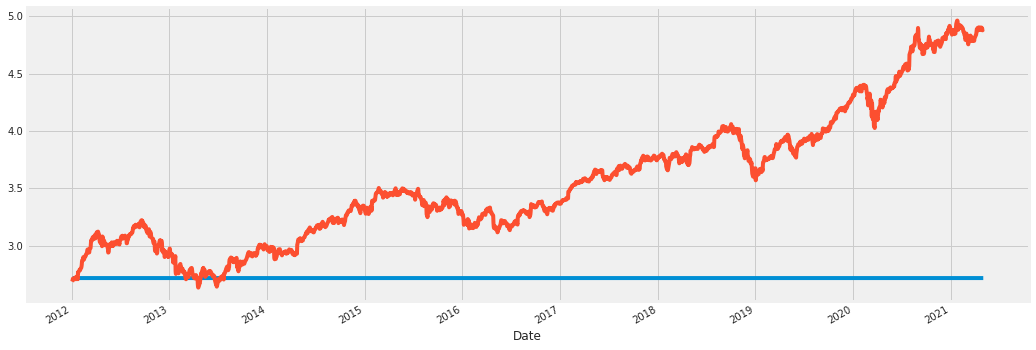

In [41]:
# Manual params

model=sm.tsa.ARIMA(df_train['Close'][1:], order=(2, 1, 1)).fit()
df_train['forecast'] = np.exp(invboxcox(best_model.predict(start=1, end=df_train.index[-1]), lmbda))
plt.figure(figsize=(16,6))
df_train['forecast'].plot()
df_train['Close'].plot()

In [42]:
df_train['forecast']

Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05    2.718429
2012-01-06    2.718429
2012-01-09    2.718429
                ...   
2021-04-27    2.718429
2021-04-28    2.718429
2021-04-29    2.718429
2021-04-30    2.718429
2021-05-03    2.718429
Name: forecast, Length: 2348, dtype: float64

# LSTM model

In [132]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2181, 60, 1)

In [133]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2181/2181 [==============================] - 65s 29ms/step - loss: 0.0020
Epoch 2/10
2181/2181 [==============================] - 62s 28ms/step - loss: 2.9302e-04
Epoch 3/10
2181/2181 [==============================] - 62s 28ms/step - loss: 3.3286e-04
Epoch 4/10
2181/2181 [==============================] - 61s 28ms/step - loss: 3.3672e-04
Epoch 5/10
2181/2181 [==============================] - 61s 28ms/step - loss: 3.0766e-04
Epoch 6/10
2181/2181 [==============================] - 63s 29ms/step - loss: 2.2137e-04
Epoch 7/10
2181/2181 [==============================] - 62s 28ms/step - loss: 2.0981e-04
Epoch 8/10
2181/2181 [==============================] - 62s 28ms/step - loss: 1.7950e-04
Epoch 9/10
2181/2181 [==============================] - 63s 29ms/step - loss: 2.0321e-04
Epoch 10/10
2181/2181 [==============================] - 62s 29ms/step - loss: 2.1793e-04


In [134]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [135]:
print('R_squared: {} \nMSE: {} \nMAE: {} \n'.format(r2_score(y_test, predictions), mean_squared_error(y_test, predictions),
      mean_absolute_error(y_test, predictions)))

R_squared: 0.6826400014093166 
MSE: 10.914769618962513 
MAE: 2.7438121697841544 



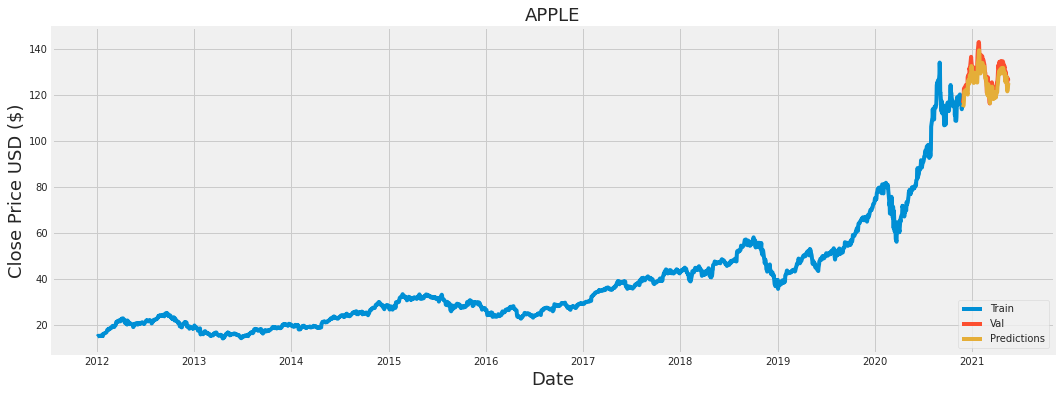

In [136]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('APPLE', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [137]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2181/2181 [==============================] - 62s 29ms/step - loss: 1.5976e-04


R_squared: 0.7895222401631613 
MSE: 7.238833717973982 
MAE: 2.1314664661374865 



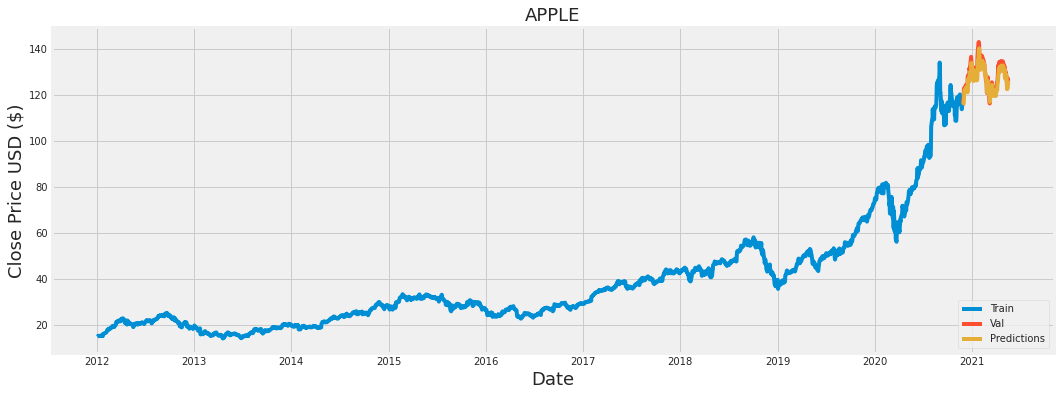

In [138]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

print('R_squared: {} \nMSE: {} \nMAE: {} \n'.format(r2_score(y_test, predictions), mean_squared_error(y_test, predictions),
      mean_absolute_error(y_test, predictions)))

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('APPLE', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [85]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-27,116.589996,122.659187
2020-11-30,119.050003,122.381195
2020-12-01,122.720001,122.593971
2020-12-02,123.080002,123.509964
2020-12-03,122.940002,124.675240
...,...,...
2021-05-11,125.910004,136.085129
2021-05-12,122.769997,135.258667
2021-05-13,124.970001,134.037857
